In [54]:
import glob
import math
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fbprophet import Prophet
from sklearn import neighbors, ensemble, tree, metrics
from statsmodels.graphics import tsaplots

%matplotlib notebook

package_dir = os.getcwd()

print(package_dir)

C:\Users\Sebastian\Programming\Bachelorthtesis


In [ ]:
df = pd.DataFrame()

print('Loading CSVs\n')
for file in glob.glob('res/*.csv'):
    # read single file, index on StationEoI and DatetimeEnd
    read = pd.read_csv(file,
                 encoding="utf-16", parse_dates=[13, 14],
                 infer_datetime_format=True,
                 index_col=[4, 14])
    # drop 'bulk' files because they have different averaging
    bulks = read.SamplingPoint.str.lower().str.contains('bulk')
    clean = read[~bulks].copy()
    
    # ignore unnecessary columns
    clean.drop(columns=['Countrycode', 'Namespace', 'AirQualityNetwork',
                 'AirQualityStation', 'SamplingPoint', 'Sample',
                 'SamplingProcess', 'AirPollutantCode',
                 'DatetimeBegin', 'Validity', 'Verification',
                 'AveragingTime'],
        inplace=True)
    
    # make pollutant a column for better memory usage
    clean = clean.pivot(columns='AirPollutant')
    df = pd.concat([df, clean])

print('\nFinished Loading')
print('Merging')

# make names shorter    
df.index.names = ['StationEoI', 'Timestamp']
df.columns.names = [None, 'Pollutant']
df = df.sort_index()
df = df.groupby(level=[0,1]).first()


print('Finished merging')

In [ ]:
df = pd.DataFrame()

for file in glob.glob('res/*2013_timeseries.csv'):
    # read single file, index on StationEoI and DatetimeEnd
    read = pd.read_csv(file,
                 encoding="utf-16", parse_dates=[13, 14],
                 infer_datetime_format=True,
                 index_col=[4,14])
    # drop 'bulk' files because they have different averaging
    bulks = read.SamplingPoint.str.lower().str.contains('bulk')
    clean = read[~bulks].copy()
    
    # ignore unnecessary columns
    clean.drop(columns=['Countrycode', 'Namespace', 'AirQualityNetwork',
                 'AirQualityStation', 'SamplingPoint', 'Sample',
                 'SamplingProcess', 'AirPollutantCode',
                 'DatetimeBegin', 'Validity', 'Verification',
                 'AveragingTime'],
        inplace=True)
    
    pivoted = clean.pivot(columns='AirPollutant')
    
    df = pd.concat([df, pivoted])

# make pollutant a column for better memory usage
#df = df.pivot(columns='AirPollutant')

# make names shorter    
df.index.names = ['StationEoI', 'Timestamp']
df.columns.names = [None, 'Pollutant']

df = df.sort_index()
df = df.groupby(level=[0,1]).first()

df = df.interpolate()

In [ ]:
df.loc['DESN025'].Concentration.count()

In [101]:
lagged = pd.DataFrame()

for i in range(1,8):
    lagged['lag {0}d'.format(i)] = df.loc['DESN025'].Concentration.NO.shift(i, freq='H')
    
lagged = lagged.interpolate()

lagged

,lag 1d,lag 2d,lag 3d,lag 4d,lag 5d,lag 6d,lag 7d
Timestamp,,,,,,,
2013-01-02 00:00:00,36.848,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 01:00:00,42.785,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 02:00:00,13.197,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 03:00:00,16.865,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 04:00:00,18.174,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 05:00:00,7.524,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 06:00:00,8.825,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 07:00:00,31.846,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02 08:00:00,9.451,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
asdf = '2013-12-10'
end = '2013-10-01'
x_train = lagged[end:asdf].interpolate()
y_train = df.loc['DESN025'].Concentration.NO[end:asdf]
index_train = df.loc['DESN025'].Concentration.NO[end:asdf].index.values

x_test = lagged[asdf:].iloc[:-1]
y_test = df.loc['DESN025'].Concentration.NO[asdf:]
index_test = df.loc['DESN025'].Concentration.NO[asdf:].index.values

<IPython.core.display.Javascript object>


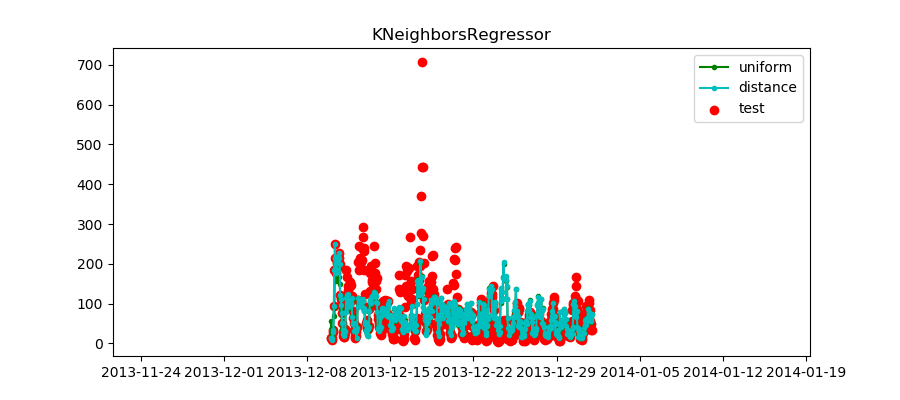

uniform mae: 38.05158586337761	mse: 3604.9637909045396
distance mae: 36.97725483311694	mse: 3554.1641156773644


In [97]:
# plt.figure(figsize=(20,10))
# #############################################################################
# Fit regression model
n_neighbors = 10

plt.figure(figsize=(9, 4))
#plt.scatter(index_train, y_train, c='k', label='train')
plt.scatter(index_test, y_test, c='r', label='test')

colors = ['g', 'c', 'y', 'orange', 'b']
solutions = {}

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn_model = knn.fit(x_train, y_train)
    y_ = knn_model.predict(x_test)
    solutions['knn %s' % weights] = y_

    plt.plot(index_test, y_, '.-', c=colors[i], label=weights)
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor")
    print('{0} mae: {1}\tmse: {2}'.format(weights, 
                                          metrics.mean_absolute_error(y_test, y_),
                                          metrics.mean_squared_error(y_test, y_)))

<IPython.core.display.Javascript object>


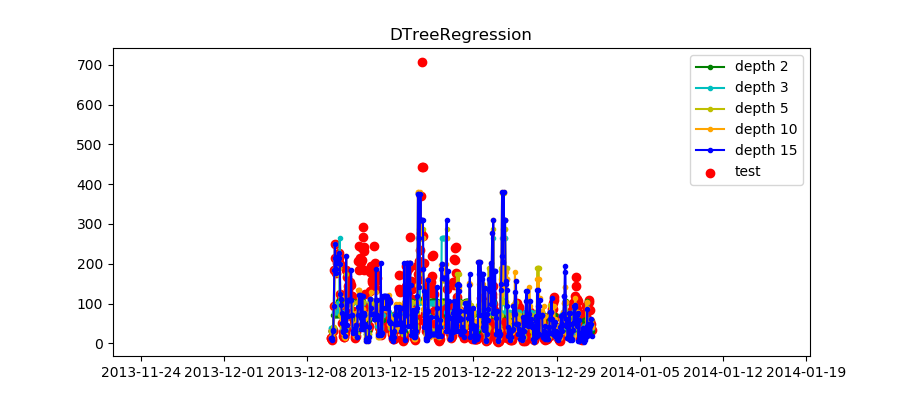

2 mae: 40.908815521561344	mse: 3990.9811202949913
3 mae: 43.985594320311186	mse: 4295.46078662153
5 mae: 44.26219753533648	mse: 4546.300705484922
10 mae: 46.409630984551356	mse: 5134.566261434179
15 mae: 49.34913339825116	mse: 5481.7909006840755


In [100]:
plt.figure(figsize=(9, 4))
#plt.scatter(index_train, y_train, c='k', label='train')
plt.scatter(index_test, y_test, c='r', label='test')

colors = ['g', 'c', 'y', 'orange', 'b']

########################################################################
for i, depth in enumerate([2, 3, 5, 10, 15]):
    dtree = tree.DecisionTreeRegressor(max_depth=depth)
    dtree_model = dtree.fit(x_train, y_train)
    y_ = dtree_model.predict(x_test)
    solutions['dtree depth %s' % depth] = y_

    plt.plot(index_test, y_, '.-', c=colors[i], label='depth {0}'.format(depth))
    plt.axis('tight')
    plt.legend()
    plt.title("DTreeRegression")
    print('{0} mae: {1}\tmse: {2}'.format(depth, 
                                          metrics.mean_absolute_error(y_test, y_),
                                          metrics.mean_squared_error(y_test, y_)))

<IPython.core.display.Javascript object>


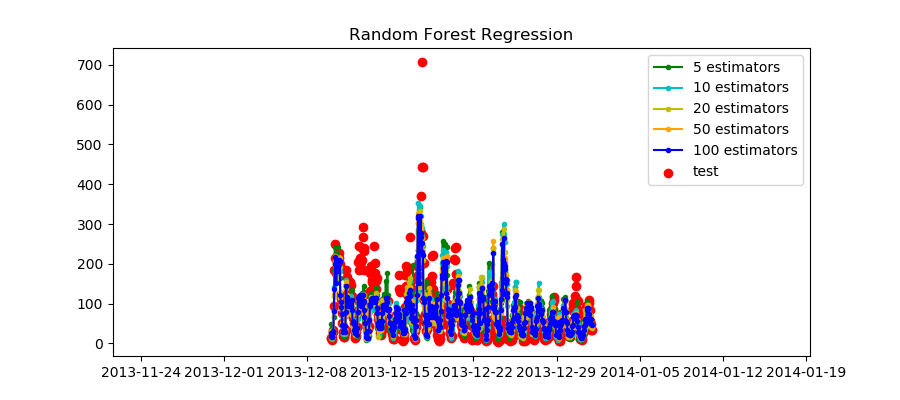

5 mae: 41.7008825426945	mse: 3762.643198441234
10 mae: 42.24820901328273	mse: 3948.07197902379
20 mae: 40.45618666982922	mse: 3598.9697307220576
50 mae: 38.85963379506641	mse: 3460.280782643821
100 mae: 39.666108586337764	mse: 3460.7046816014185


In [103]:
plt.figure(figsize=(9, 4))
#plt.scatter(index_train, y_train, c='k', label='train')
plt.scatter(index_test, y_test, c='r', label='test')

colors = ['g', 'c', 'y', 'orange', 'b']

########################################################################
for i, estimators in enumerate([5, 10, 20, 50, 100]):
    rforest = ensemble.RandomForestRegressor(n_estimators=estimators)
    rforest_model = rforest.fit(x_train, y_train)
    y_ = rforest_model.predict(x_test)
    solutions['rforest estimators {0}'.format(estimators)] = y_

    plt.plot(index_test, y_, '.-', c=colors[i], label='{0} estimators'.format(estimators))
    plt.axis('tight')
    plt.legend()
    plt.title('Random Forest Regression')
    print('{0} mae: {1}\tmse: {2}'.format(estimators, 
                                          metrics.mean_absolute_error(y_test, y_),
                                          metrics.mean_squared_error(y_test, y_)))

<IPython.core.display.Javascript object>


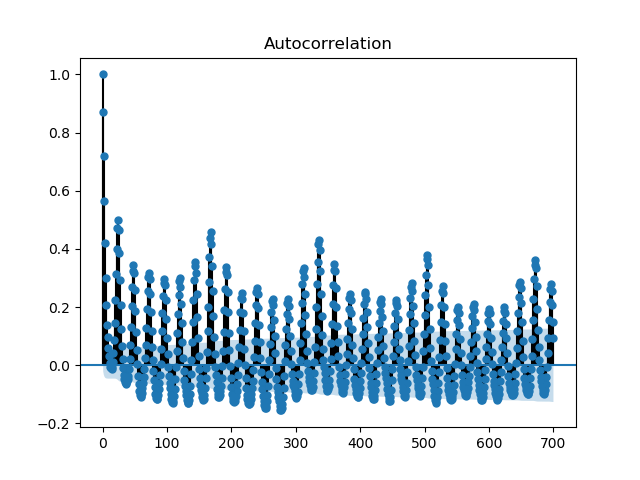

In [79]:
acf = tsaplots.plot_acf(df.loc['DESN025'].Concentration.NO, lags=700)

<IPython.core.display.Javascript object>


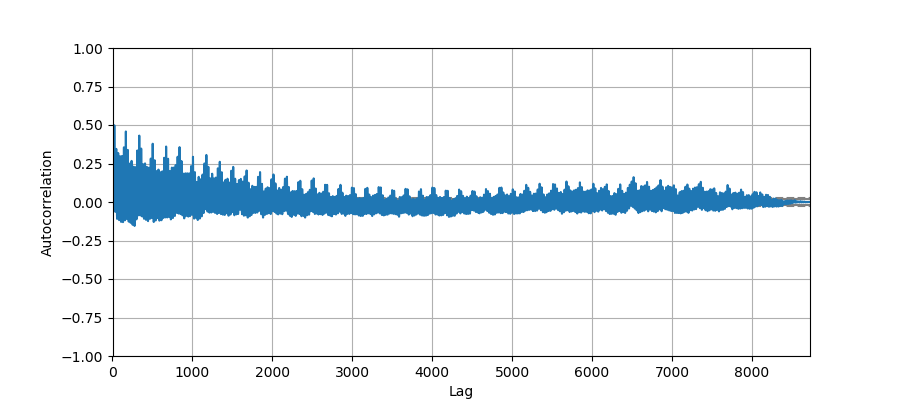

In [75]:
plt.figure(figsize=(9, 4))

pd.plotting.autocorrelation_plot(df.loc['DESN025'].Concentration.NO)
plt.show()

<IPython.core.display.Javascript object>


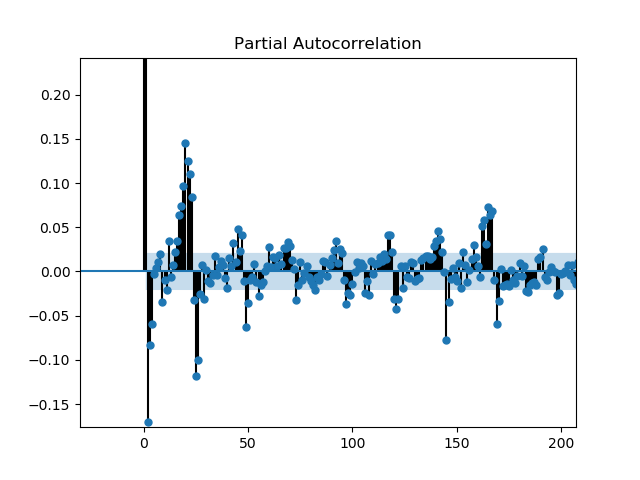

In [80]:
pacf = tsaplots.plot_pacf(df.loc['DESN025'].Concentration.NO, lags=700)